<a href="https://colab.research.google.com/github/Dethkalleon/MLKublik/blob/main/%D0%9A%D1%83%D0%B1%D0%BB%D0%B8%D0%BA%D0%95%D0%98_%D0%9C%D0%9B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛР 2.1 - Логистическая регрессия

### Цель работы

Познакомиться с широко используемым методом бинарной классификации - логистической регрессией.


### Содержание работы

1. Сгенерировать матрицу признаков и вектор целей для задачи классификации с использованием make_classification из библиотеки sklearn.datasets. Число классов возьмите равным двум.
2. Реализовать модель логистической регрессии методом градиентного спуска, не используя библиотечные функции.
3. Оценить качество построенной модели, используя метрики accuracy и F1-score.
4. Реализовать модель логистической регрессии LogisticRegression из библиотеки sklearn.linear_model и оценить качество построенной модели, используя метрики accuracy и F1-score.
5. Сравнить результаты двух реализаций.

### Выполнение

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Сгенерируем случайный набор данных

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification (n_samples=1000, # кол-во строк (точек)
                          n_features=2, #кол-во столбцов
                          n_informative=2, #задает кол-во атрибутов, реально влияющих на результат
                          n_redundant=0, #кол-во неинформативных столбцов
                          n_classes=2, #кол-во классов целевой переменной
                          class_sep=2, #насколько точки далеки друг от друга
                          random_state=1) #для повторения генерации

In [ ]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


Scatter - нам нужна диаграмма рассеивания
По горизонтали - первая колонка (X[:, 0]). По вертикали - значение второй колонки (X[:, 1])

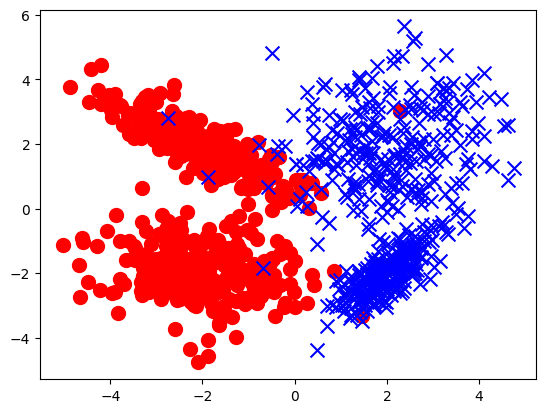

In [ ]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

Опишем класс для градиентного спуска. Этот класс абстрактный

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b) #не реализован. Будет реализован в наследниках
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

Далее реализуем класс логистической регрессии. Конструктор здесь нам не нужен, так как он будет наследоваться. А начнем непосредственно с функции гипотезы

In [ ]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

Перед созданием объекта класса добавим фиктивный столбец единиц к матрице признаков X

In [ ]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
X

array([[ 1.        ,  1.86341137,  0.08764555],
       [ 1.        , -1.53099717,  1.90118241],
       [ 1.        , -0.01722404, -2.59111159],
       ...,
       [ 1.        ,  2.33019532,  4.72180951],
       [ 1.        , -2.01084076,  1.42633933],
       [ 1.        , -2.00873243,  2.24540194]])

Теперь нам нужно использовать созданную модель. Создаём экземпляр класса модели. Обучим её и сделаем предсказание:

In [ ]:
logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)
y_pred[:5]

array([ True, False, False, False,  True])

Выводим метрики качества:

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.98 F1-score = 0.98


Выведем значения вероятностей для каждого объекта принадлежать тому или иному классу:

In [ ]:
y_pred_proba = logreg.predict_proba(X)
y_pred_proba[:5]

array([9.97639678e-01, 9.96249026e-03, 1.78033798e-01, 3.42428157e-04,
       9.99999853e-01])

Для начала надо подготовить равномерные данные для рисования функции гипотезы. Нам понадобится создать двумерную сетку.

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
XX

array([[ 1.        , -6.03367039, -5.76154392],
       [ 1.        , -6.02367039, -5.76154392],
       [ 1.        , -6.01367039, -5.76154392],
       ...,
       [ 1.        ,  5.72632961,  6.62845608],
       [ 1.        ,  5.73632961,  6.62845608],
       [ 1.        ,  5.74632961,  6.62845608]])

В данном коде мы создаем двумерную матрицу, содержащую все комбинации значений признаков в заданном диапазоне. Другими словами, мы создаем равномерную сетку в прямоугольнике от минимального до максимального значения каждого признака (отступая для красоты 1 в обоих направлениях).

In [ ]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

Данный код выполнит предсказание модели в каждой точке нашей сетки. Эти данные мы сможем использовать для того, чтобы построить контурный график вот так:

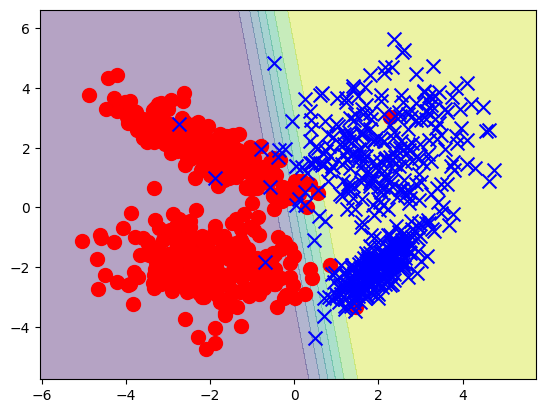

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

Теперь проделаем то же самое, используя библиотечные функции.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)
y_pred_lr[:5]

array([1, 0, 0, 0, 1])

### Задания для самостоятельного выполнения

#### Задание 1
Выведите результаты работы библиотечной модели - в численном и в графическом виде.

In [ ]:
model = LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)

accuracy_lr = accuracy_score(y, y_pred_lr)
f1_lr = f1_score(y, y_pred_lr)

print(f'accuracy (библиотечная) = {accuracy_lr:.2f} F1-score (библиотечная) = {f1_lr:.2f}')

accuracy (библиотечная) = 0.98 F1-score (библиотечная) = 0.98


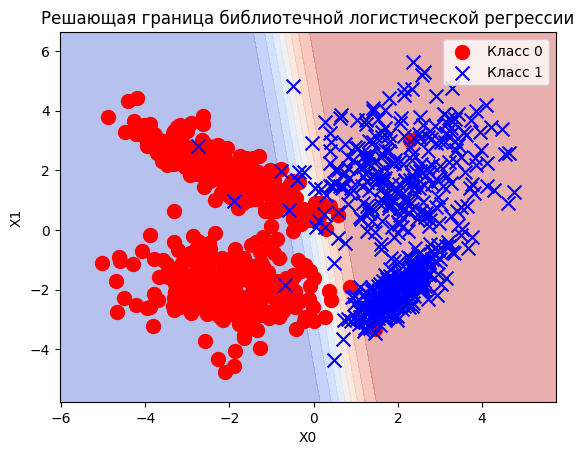

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X[:, 1].min()-1, X[:, 1].max()+1, 0.01),
    np.arange(X[:, 2].min()-1, X[:, 2].max()+1, 0.01)
)
XX_grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
Z = model.predict_proba(XX_grid)[:, 1]
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, levels=np.linspace(0, 1, 10), cmap="coolwarm")

plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100, label="Класс 0")
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100, label="Класс 1")

plt.title('Решающая граница библиотечной логистической регрессии')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()

#### Задание 2
Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

Модифицируем класс для работы с потерями

In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        self.loss_history = []

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for _ in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
            loss = self.compute_loss(X, y, b)
            self.loss_history.append(loss)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

    # Функция потерь
    def compute_loss(self, X, y, b):
        predictions = self.sigmoid(X, b)
        return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

<ipython-input-48-13d2b96cb7c1>:28: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-48-13d2b96cb7c1>:28: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


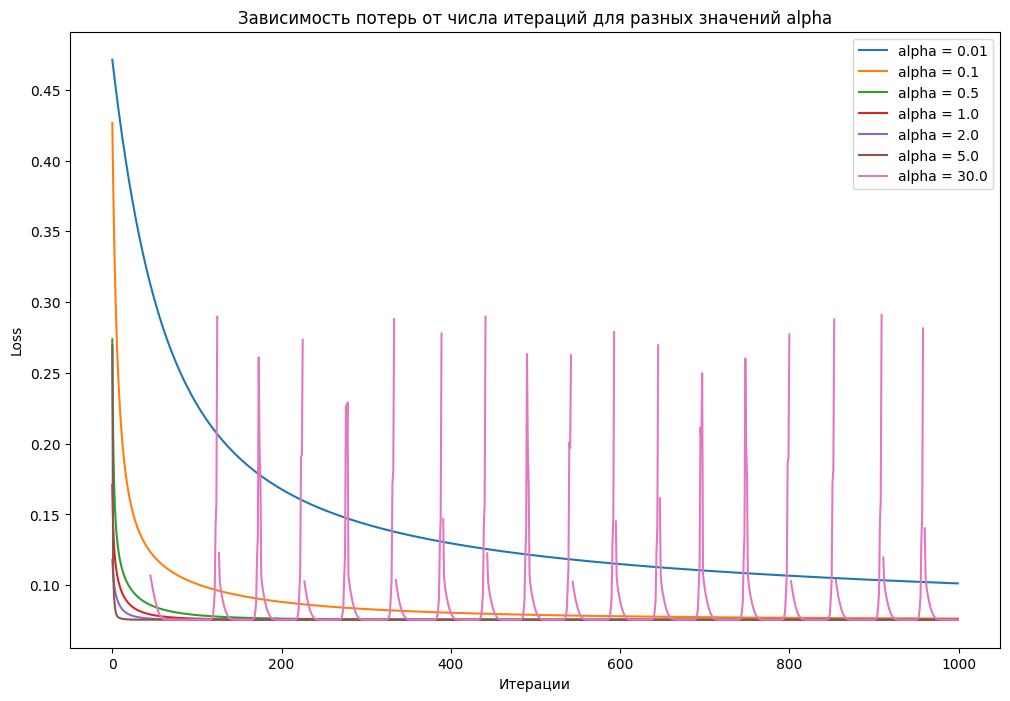

In [ ]:
alphas = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 30.0]
plt.figure(figsize=(12, 8))

for alpha in alphas:
    model = LogReg(alpha=alpha, n_iters=1000)
    model.fit(X, y)

    plt.plot(model.loss_history, label=f'alpha = {alpha}')

plt.xlabel('Итерации')
plt.ylabel('Loss')
plt.title('Зависимость потерь от числа итераций для разных значений alpha')
plt.legend()
plt.show()

#### Задание 3
Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.


In [ ]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
        self.loss_history = []

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for _ in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)

            loss = self.compute_loss(X, y, b)
            self.loss_history.append(loss)
        return b

    def fit(self, X, y):
        # Добавленная строка
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

    def compute_loss(self, X, y, b):
        predictions = self.sigmoid(X, b)
        return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        # Добавленная строка
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [ ]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, class_sep=2, random_state=1)

model = LogReg(alpha=0.5, n_iters=1000)
model.fit(X, y)

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'Accuracy = {accuracy:.2f}, F1-score = {f1:.2f}')

Accuracy = 0.98, F1-score = 0.98


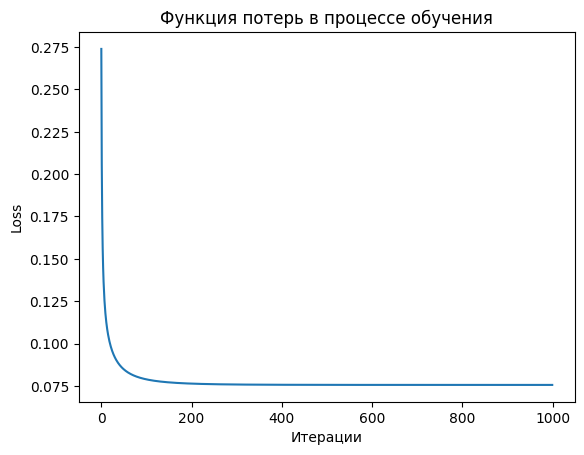

In [ ]:
plt.plot(model.loss_history)
plt.xlabel('Итерации')
plt.ylabel('Loss')
plt.title('Функция потерь в процессе обучения')
plt.show()

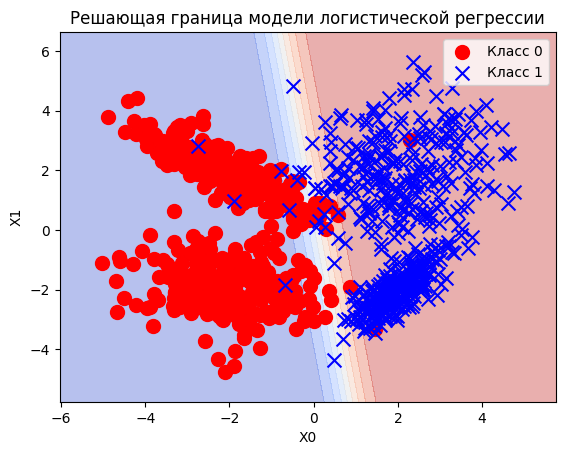

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
    np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01)
)
XX_grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]

Z = model.predict_proba(XX_grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, levels=np.linspace(0, 1, 10), cmap="coolwarm")

plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100, label="Класс 0")
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100, label="Класс 1")

plt.title('Решающая граница модели логистической регрессии')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.show()

#### Задание 4
Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

Создадим функцию для удобства. Она будет выводить всю информацию о распределении классов при определенном параметре class_separation

In [ ]:
def evaluate_class_sep(class_sep_values, alpha=0.5, n_iters=1000):
    accuracies = []
    f1_scores = []

    for sep in class_sep_values:
        X, y = make_classification(
            n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
            n_classes=2, class_sep=sep, random_state=1
        )

        plt.figure(figsize=(5, 5))
        plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100, label="Класс 0")
        plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100, label="Класс 1")
        plt.title(f"Распределение данных при class_sep={sep}")
        plt.xlabel('X0')
        plt.ylabel('X1')
        plt.legend()
        plt.show()

        model = LogReg(alpha=alpha, n_iters=n_iters)
        model.fit(X, y)
        y_pred = model.predict(X)

        accuracy = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        accuracies.append(accuracy)
        f1_scores.append(f1)

        print(f"class_sep={sep} -> Accuracy = {accuracy:.2f}, F1-score = {f1:.2f}")

    plt.figure(figsize=(10, 5))
    plt.plot(class_sep_values, accuracies, label="Accuracy", marker='o')
    plt.plot(class_sep_values, f1_scores, label="F1 Score", marker='x')
    plt.xlabel("Class Separation (class_sep)")
    plt.ylabel("Score")
    plt.title("Влияние параметра class_sep на точность и F1-меру")
    plt.legend()
    plt.show()

Используем функцию с разными распределениями

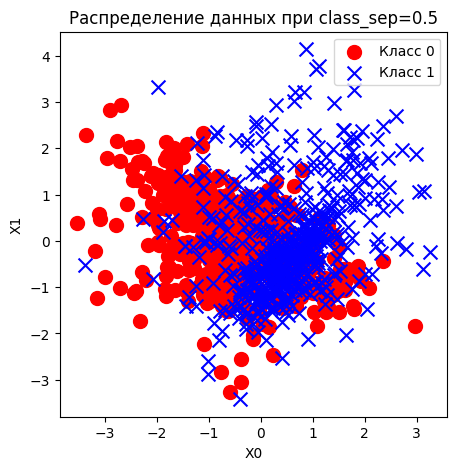

class_sep=0.5 -> Accuracy = 0.71, F1-score = 0.71


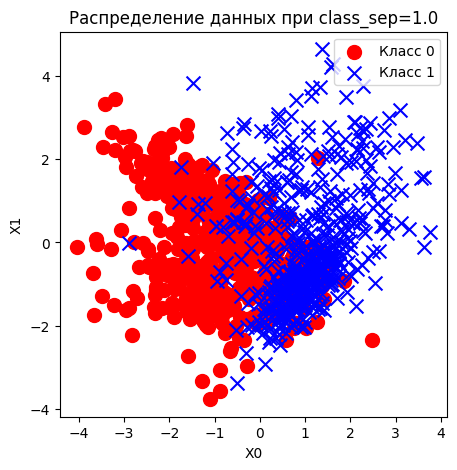

class_sep=1.0 -> Accuracy = 0.85, F1-score = 0.85


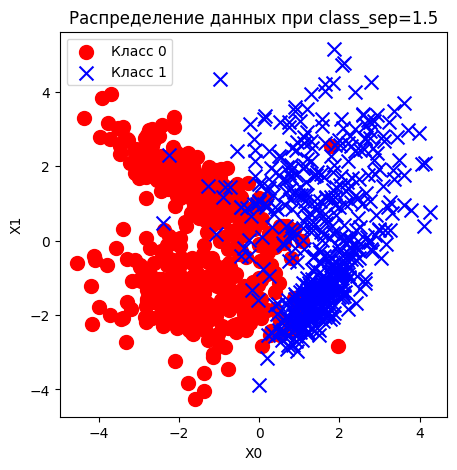

class_sep=1.5 -> Accuracy = 0.94, F1-score = 0.94


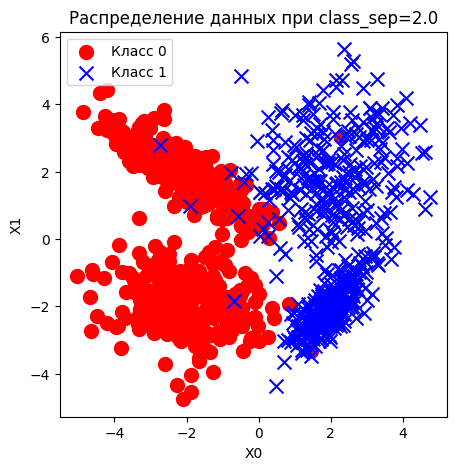

class_sep=2.0 -> Accuracy = 0.98, F1-score = 0.98


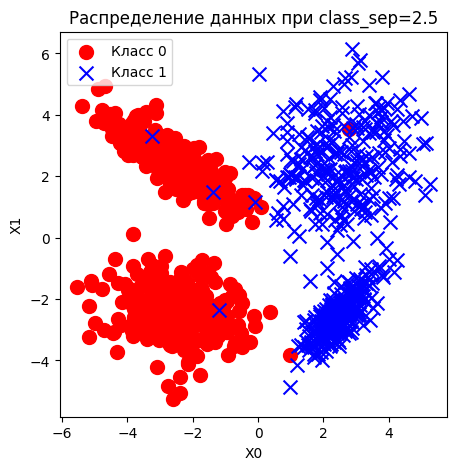

class_sep=2.5 -> Accuracy = 0.99, F1-score = 0.99


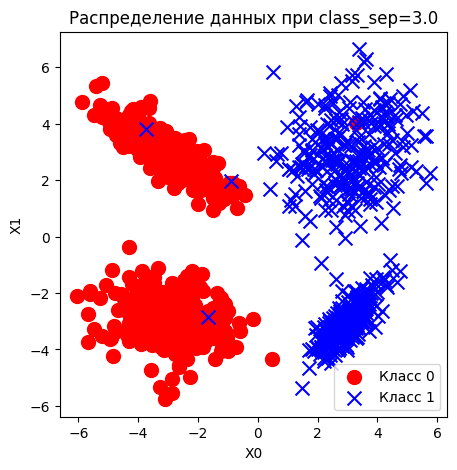

class_sep=3.0 -> Accuracy = 0.99, F1-score = 1.00


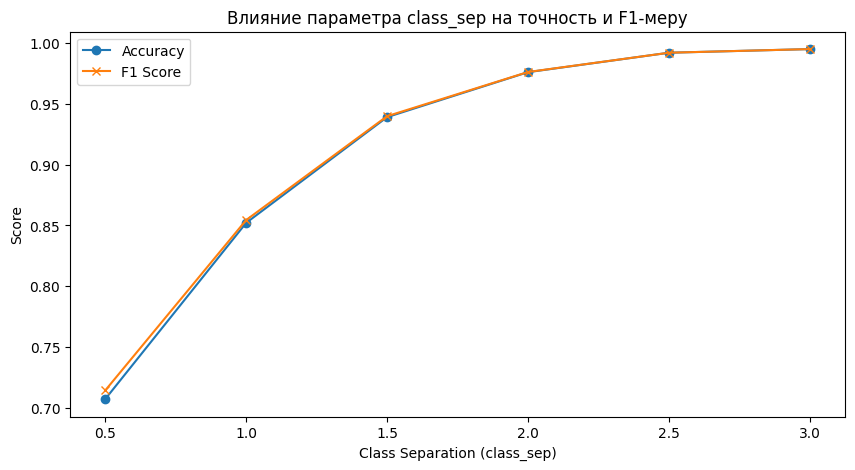

In [ ]:
class_sep_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
evaluate_class_sep(class_sep_values)

#### Задание 5
Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

Accuracy = 0.88, F1-score = 0.89


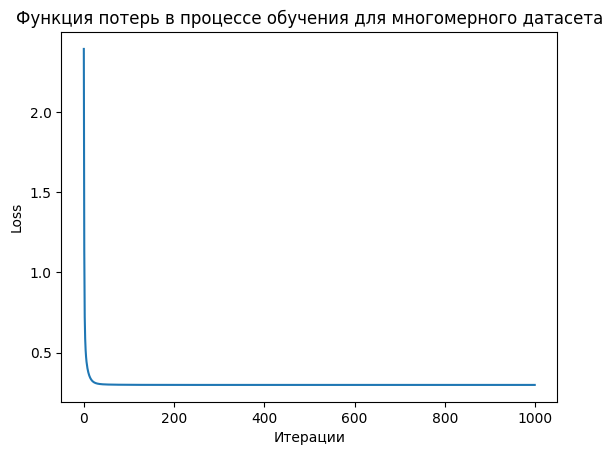

In [ ]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    n_classes=2,
    class_sep=1.5,
    random_state=1
)

model = LogReg(alpha=0.5, n_iters=1000)
model.fit(X, y)

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'Accuracy = {accuracy:.2f}, F1-score = {f1:.2f}')

plt.plot(model.loss_history)
plt.xlabel('Итерации')
plt.ylabel('Loss')
plt.title('Функция потерь в процессе обучения для многомерного датасета')
plt.show()

#### Задание 6
Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.


In [ ]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    n_classes=4,
    n_clusters_per_class=1,
    random_state=1
)

class LogReg:
    def __init__(self, alpha=0.5, n_iters=1000):
        self.alpha = alpha
        self.n_iters = n_iters
        self.b = None
        self.loss_history = []

    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.T.dot(self.sigmoid(X, b) - y)
        return grad

    def gradient_step(self, b, b_grad):
        return b - self.alpha * b_grad

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])

        m = X.shape[1]
        b = np.ones(m)

        for _ in range(self.n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
            loss = -np.mean(y * np.log(self.sigmoid(X, b)) + (1 - y) * np.log(1 - self.sigmoid(X, b)))
            self.loss_history.append(loss)

        self.b = b

    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(X, self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

class MultiClassLogReg:
    def __init__(self, alpha=0.5, n_iters=1000):
        self.alpha = alpha
        self.n_iters = n_iters
        self.classifiers = []

    def fit(self, X, y):
        n_classes = len(np.unique(y)) #Кол-во классов
        for class_label in range(n_classes): #Номер класса
            # np.dnarray из нулей и единиц
            # 0, если не текущий класс, 1 - текущий
            y_binary = (y == class_label).astype(int)
            # Используем наш классификатор для бинарных игриков
            classifier = LogReg(alpha=self.alpha, n_iters=self.n_iters)
            classifier.fit(X, y_binary)
            self.classifiers.append(classifier)

    def predict_proba(self, X):
        probas = np.zeros((X.shape[0], len(self.classifiers)))
        for i, classifier in enumerate(self.classifiers):
            probas[:, i] = classifier.predict_proba(X)
        return probas

    def predict(self, X):
        probas = self.predict_proba(X)
        return np.argmax(probas, axis=1)

In [ ]:
multi_class_model = MultiClassLogReg(alpha=0.5, n_iters=1000)
multi_class_model.fit(X, y)
y_pred_custom = multi_class_model.predict(X)

accuracy_custom = accuracy_score(y, y_pred_custom)
f1_custom = f1_score(y, y_pred_custom, average='weighted')
print(f'Custom model -> Accuracy = {accuracy_custom:.2f}, F1-score = {f1_custom:.2f}')

Custom model -> Accuracy = 0.83, F1-score = 0.82


In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
sklearn_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
sklearn_model.fit(X, y)
y_pred_sklearn = sklearn_model.predict(X)

accuracy_sklearn = accuracy_score(y, y_pred_sklearn)
f1_sklearn = f1_score(y, y_pred_sklearn, average='weighted')
print(f'Sklearn model -> Accuracy = {accuracy_sklearn:.2f}, F1-score = {f1_sklearn:.2f}')

Sklearn model -> Accuracy = 0.83, F1-score = 0.83


#### Задание 7
Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression.

In [ ]:
sklearn_model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
sklearn_model.fit(X, y)

probabilities = sklearn_model.predict_proba(X)

prob_df = pd.DataFrame(probabilities, columns=[f'Class_{i}_prob' for i in range(probabilities.shape[1])])
print(prob_df.head())

   Class_0_prob  Class_1_prob  Class_2_prob  Class_3_prob
0      0.001694      0.072287      0.614667      0.311351
1      0.710766      0.017323      0.253273      0.018638
2      0.435173      0.000074      0.248882      0.315871
3      0.097035      0.001495      0.817687      0.083783
4      0.236446      0.000012      0.646451      0.117091


# ЛР 2.2 - Классификация на реальных данных

### Цель работы
Познакомиться с основными приемами работы с моделями регрессии в scikit-learn.

### Содержание работы
1. Загрузите данные о диагностике сахарного диабета.
2. Постройте модель классификации для предсказания наличия заболевания.
3. Оцените качество построенной модели с помощью отчета о классификации и матрицы классификации.
4. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

### Выполнение

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Проверим данные на наличие пропущенных значений

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Основная статистика по датасету:

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Здесь мы видим шкалу измерения каждого признака. Можно придти к выводу, что явных видимых аномалий в данных нет. Столбец "Outcome" содержит целевую переменную. В данном случае она также выражается числом (0 - здоров, 1 - болен).

Выделим целевую переменную и факторы:

In [ ]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)
y.shape, X.shape

((768,), (768, 8))

Данные выглядят полностью готовыми к началу машинного обучения. Для начала импортируем нужный класс, создадим его экземпляр и обучим

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Видим предупреждение. Смысл этого сообщения в том, что процесс обучения завершился по условию достижения максимального количества итераций, а не по условию стабилизации функции ошибки. Это значит, что модель обучается трудно и медленно. Это может свидетельствовать о том, что результаты могут быть не очень удовлетворительными.

Посмотрим, что за модель мы получили после такого обучения. В первую очередь выведем коэффициенты модели:

In [ ]:
print("Coefficients: \n", logistic.coef_[0])

Coefficients: 
 [ 1.17252323e-01  3.35996240e-02 -1.40874333e-02 -1.27055194e-03
 -1.24030932e-03  7.72025779e-02  1.41904101e+00  1.00355633e-02]


В линейных моделях коэффициенты имеют физический смысл - они показывают значимость соответствующих признаков. Поэтому представляет особый интерес посмотреть коэффициенты вместе с названиями признаков.

Для этого соединим массив названий колонок из датасета и массив коэффициентов. Можно использовать, например, генераторное выражение для прохода по получившемуся массиву:

In [ ]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]

Pregnancies 0.11725232256061724
Glucose 0.03359962395485557
BloodPressure -0.014087433346880599
SkinThickness -0.0012705519414239344
Insulin -0.0012403093150474788
BMI 0.07720257786510536
DiabetesPedigreeFunction 1.419041006173723
Age 0.01003556334281655


Вывод. Самое большое влияние на целевую переменную с большим отрывом оказывает столбец - DiabetesPedigreeFunction (Диабет Родословная Функция)

Свободный член:

In [ ]:
print("Intercept: \n", logistic.intercept_)

Intercept: 
 [-7.70289515]


Построим прогноз и выведем сравнение с реальными данными:

In [ ]:
y_pred = logistic.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


Так сравнивать все значения в ручном режиме очень неудобно. Поэтому лучше использовать специальные функции - метрики. Самая простая из них подсчитывает количество правильно и неправильно распознанных объектов и представляет результат в виде матрицы классификации:


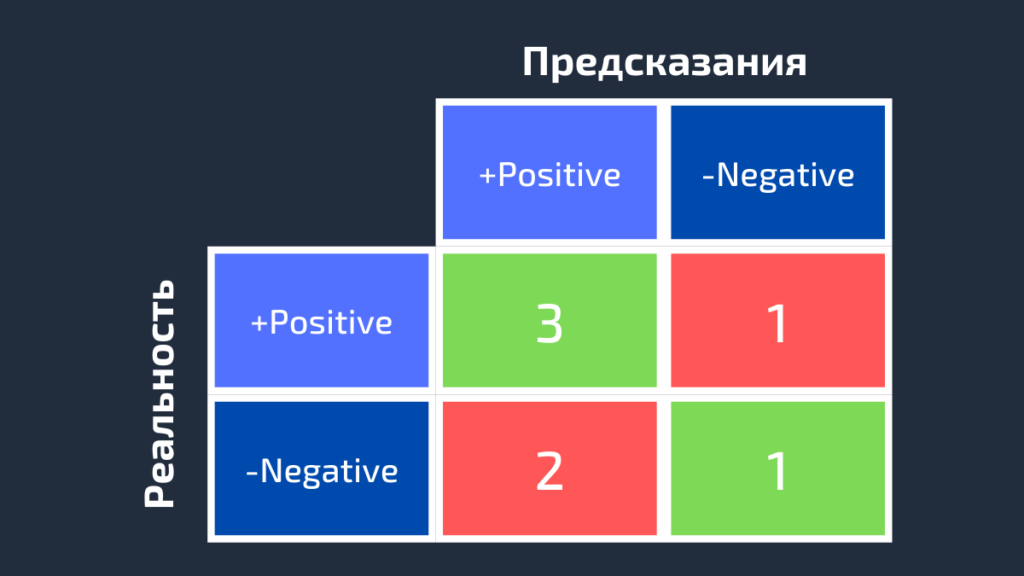

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

<Axes: >

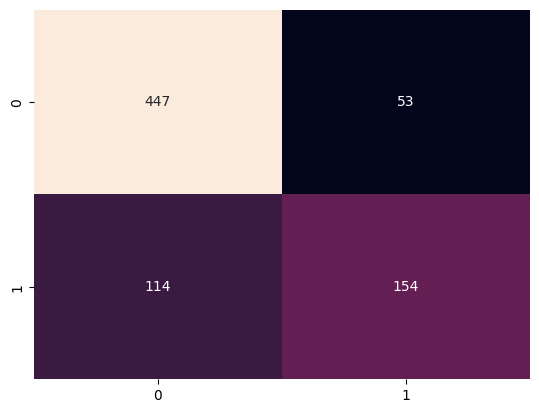

In [ ]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='0.0f', cbar=False)

Кроме матрицы классификации весьма полезно использовать численные метрики эффективности классификации. Самая простая и распространенная из них - метрика точности предсказания - показывает долю правильно распознанных объектов. Расчет этой метрики встроен в сам объект модели и доступен с помощью специального метода:

In [ ]:
logistic.score(X, y)

0.7825520833333334

Эту же метрику можно рассчитать и по-другому - через отдельную функцию из пакета metrics. Обратим внимание на другую сигнатуру метода:



In [ ]:
accuracy_score(y, y_pred)

0.7825520833333334

Значение метрики (0,78) показывает, что модель в среднем делает ошибки в 22% процентов случаев. Это основной показатель качества модели.

Если же такой уровень эффективности нас не устраивает, то мы можем попробовать использовать другие классы моделей классификации и среди них выбрать наиболее качественную. Например, можно попробовать построить полиномиальную модель. В библиотеке sklearn не предусмотрено отдельного класса полиномиальной модели. Ее можно создать через специальный объект PolynomialFeature, который добавляет полиномиальные признаки к данным.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2)
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]])

Теперь эти данные можно использовать как исходные для моделирования. А строить мы будем обычную логистическую регрессию:

In [ ]:
polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(classification_report(y, y_pred_poly))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       500
           1       0.61      0.56      0.59       268

    accuracy                           0.72       768
   macro avg       0.69      0.69      0.69       768
weighted avg       0.72      0.72      0.72       768



### Задания для самостоятельного выполнения

#### Задание 1
Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Модель: Дерево решений
Точность: 0.75
Матрица путаницы: [[75 24]
 [15 40]]
Отчет о классификации:               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

--------------------------------------------------


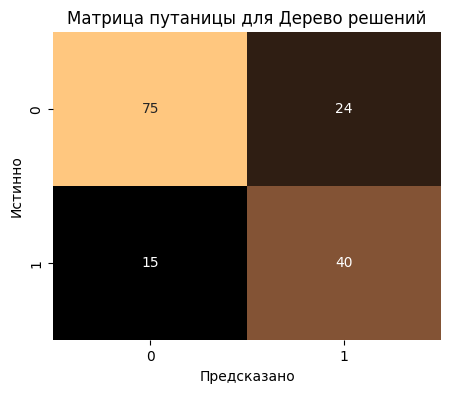

Модель: Метод k ближайших соседей
Точность: 0.65
Матрица путаницы: [[65 34]
 [20 35]]
Отчет о классификации:               precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154

--------------------------------------------------


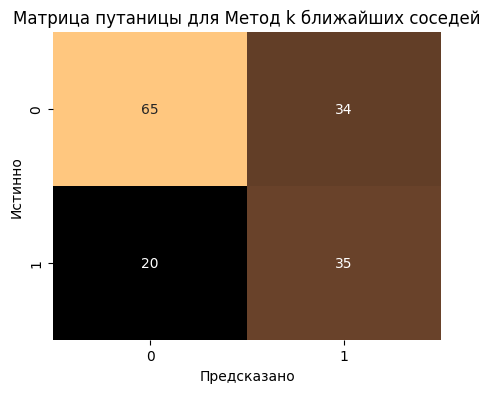

Модель: Случайный лес
Точность: 0.72
Матрица путаницы: [[77 22]
 [21 34]]
Отчет о классификации:               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

--------------------------------------------------


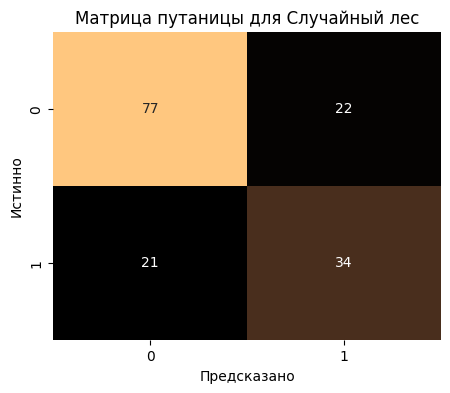

Модель: Логистическая регрессия
Точность: 0.75
Матрица путаницы: [[78 21]
 [18 37]]
Отчет о классификации:               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

--------------------------------------------------


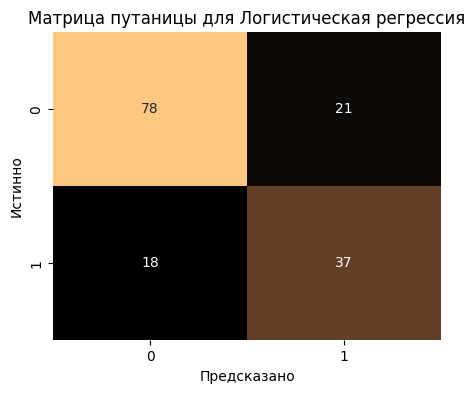

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    'Дерево решений': DecisionTreeClassifier(random_state=42),
    'Метод k ближайших соседей': KNeighborsClassifier(n_neighbors=3),
    'Случайный лес': RandomForestClassifier(n_estimators=100, random_state=42),
    'Логистическая регрессия': LogisticRegression(max_iter=200)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    results[name] = {
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'classification_report': cr
    }

# Вывод результатов
for name, result in results.items():
    print(f"Модель: {name}")
    print(f"Точность: {result['accuracy']:.2f}")
    print("Матрица путаницы:", result['confusion_matrix'])
    print("Отчет о классификации:", result['classification_report'])
    print("-" * 50)

    # Визуализация матрицы ошибок
    plt.figure(figsize=(5, 4))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='0.0f', cmap='copper', cbar=False)
    plt.title(f'Матрица путаницы для {name}')
    plt.xlabel('Предсказано')
    plt.ylabel('Истинно')
    plt.show()


#### Задание 2
Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:

i) Метод опорных векторов

Без ядра

Модель: SVM (Без ядра)
Точность: 0.75
Матрица путаницы: [[80 19]
 [19 36]]
Отчет о классификации:               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

--------------------------------------------------


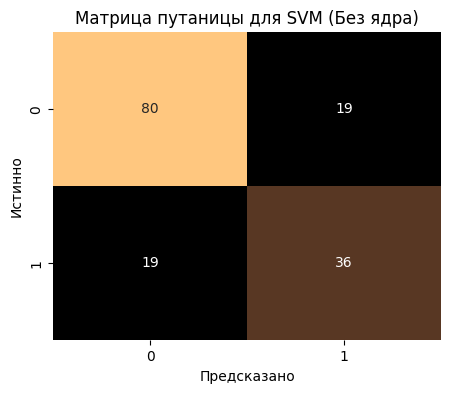

In [ ]:
from sklearn.svm import SVC

svm_no_kernel = SVC(kernel='linear', random_state=42)

svm_no_kernel.fit(X_train, y_train)
y_pred = svm_no_kernel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)


print("Модель: SVM (Без ядра)")
print(f"Точность: {accuracy:.2f}")
print("Матрица путаницы:", cm)
print("Отчет о классификации:", cr)
print("-" * 50)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='0.0f', cmap='copper', cbar=False)
plt.title('Матрица путаницы для SVM (Без ядра)')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()

С гауссовым ядром

Модель: SVM (Гауссово ядро)
Точность: 0.77
Матрица путаницы: [[87 12]
 [24 31]]
Отчет о классификации:               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

--------------------------------------------------


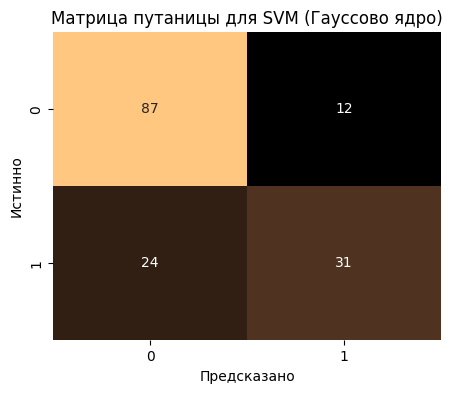

In [ ]:
svm_rbf_kernel = SVC(kernel='rbf', random_state=42)

svm_rbf_kernel.fit(X_train, y_train)
y_pred = svm_rbf_kernel.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Вывод результатов
print("Модель: SVM (Гауссово ядро)")
print(f"Точность: {accuracy:.2f}")
print("Матрица путаницы:", cm)
print("Отчет о классификации:", cr)
print("-" * 50)

# Визуализация матрицы ошибок
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='0.0f', cmap='copper', cbar=False)
plt.title('Матрица путаницы для SVM (Гауссово ядро)')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()


С полиномиальным ядром

Модель: SVM (Полиномиальное ядро)
Точность: 0.76
Матрица путаницы: [[87 12]
 [25 30]]
Отчет о классификации:               precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154

--------------------------------------------------


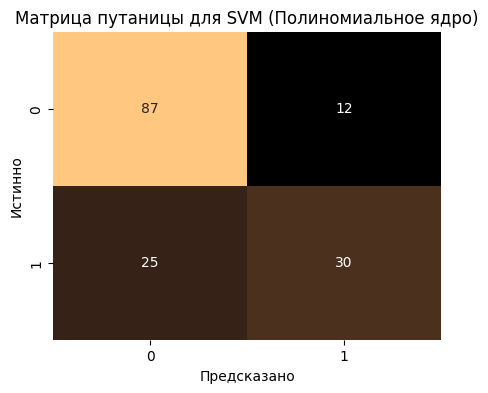

In [ ]:
svm_poly_kernel = SVC(kernel='poly', degree=3, random_state=42)

# Обучение и предсказание
svm_poly_kernel.fit(X_train, y_train)
y_pred = svm_poly_kernel.predict(X_test)

# Оценка
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Вывод результатов
print("Модель: SVM (Полиномиальное ядро)")
print(f"Точность: {accuracy:.2f}")
print("Матрица путаницы:", cm)
print("Отчет о классификации:", cr)
print("-" * 50)

# Визуализация матрицы ошибок
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='0.0f', cmap='copper', cbar=False)
plt.title('Матрица путаницы для SVM (Полиномиальное ядро)')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()


ii) Метод ближайших соседей

Матрица путаницы:
[[82 17]
 [28 27]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.75      0.83      0.78        99
           1       0.61      0.49      0.55        55

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



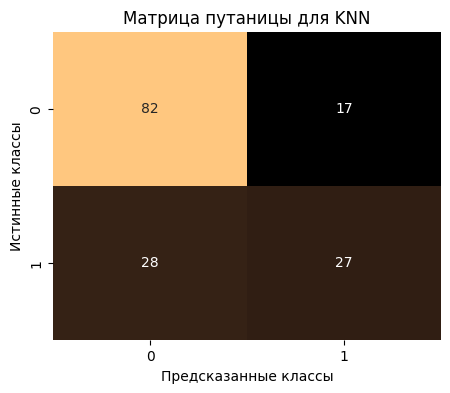

In [ ]:
# Создание модели KNN с k=4
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Матрица путаницы:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))

# Визуализация матрицы ошибок
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='0.0f', cmap='copper', cbar=False)

plt.title('Матрица путаницы для KNN')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.show()


iii) Многослойный перцептрон

Модель: Многослойный перцептрон
Точность: 0.70
Матрица путаницы:
[[71 28]
 [18 37]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76        99
           1       0.57      0.67      0.62        55

    accuracy                           0.70       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.70      0.71       154

--------------------------------------------------


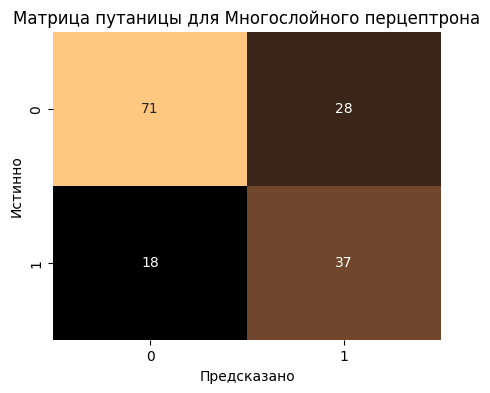

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Вывод результатов
print("Модель: Многослойный перцептрон")
print(f"Точность: {accuracy:.2f}")
print("Матрица путаницы:")
print(cm)
print("Отчет о классификации:")
print(cr)
print("-" * 50)

# Визуализация матрицы ошибок
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='0.0f', cmap='copper', cbar=False)
plt.title('Матрица путаницы для Многослойного перцептрона')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()


iV) Дерево решений

Модель: Дерево решений
Точность: 0.75
Матрица путаницы:
[[75 24]
 [15 40]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

--------------------------------------------------


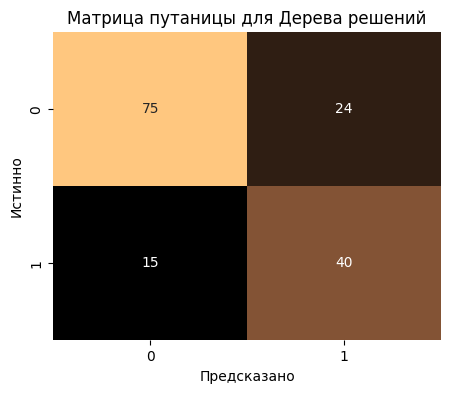

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Вывод результатов
print("Модель: Дерево решений")
print(f"Точность: {accuracy:.2f}")
print("Матрица путаницы:")
print(cm)
print("Отчет о классификации:")
print(cr)
print("-" * 50)

# Визуализация матрицы ошибок
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='0.0f', cmap='copper', cbar=False)
plt.title('Матрица путаницы для Дерева решений')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()


V) Другие методы

Случайный лес

Модель: Случайный лес
Точность: 0.72
Матрица путаницы:
[[77 22]
 [21 34]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

--------------------------------------------------


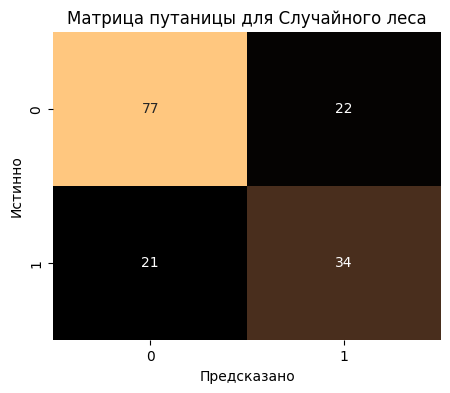

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Вывод результатов
print("Модель: Случайный лес")
print(f"Точность: {accuracy:.2f}")
print("Матрица путаницы:")
print(cm)
print("Отчет о классификации:")
print(cr)
print("-" * 50)

# Визуализация матрицы ошибок
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='0.0f', cmap='copper', cbar=False)
plt.title('Матрица путаницы для Случайного леса')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()


Беггинг

Модель: Бэггинг
Точность: 0.74
Матрица путаницы:
[[77 22]
 [18 37]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

--------------------------------------------------


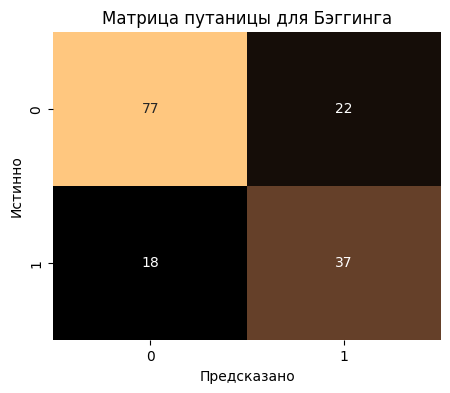

In [ ]:
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(estimator=base_classifier, n_estimators=100, random_state=42)

bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Вывод результатов
print("Модель: Бэггинг")
print(f"Точность: {accuracy:.2f}")
print("Матрица путаницы:")
print(cm)
print("Отчет о классификации:")
print(cr)
print("-" * 50)

# Визуализация матрицы ошибок
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='0.0f', cmap='copper', cbar=False)
plt.title('Матрица путаницы для Бэггинга')
plt.xlabel('Предсказано')
plt.ylabel('Истинно')
plt.show()


#### Задание 3
Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [ ]:
def train_and_evaluate_models(X, y):
    #Обучает и оценивает точность различных моделей машинного обучения, возвращает словарь, содержащий точность каждой модели
    models = {
        "SVM (Без ядра)": SVC(kernel='linear'),
        "SVM (Линейное ядро)": SVC(kernel='linear'),
        "SVM (Гауссово ядро)": SVC(kernel='rbf'),
        "SVM (Полиномиальное ядро)": SVC(kernel='poly'),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "MLP": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=500),
        "Дерево решений": DecisionTreeClassifier()
    }

    results = {}
    for model_name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)
        results[model_name] = accuracy

    return results

In [ ]:
#Обучаем и оцениваем модели
results = train_and_evaluate_models(X, y)

#Выводим результаты
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

SVM (Без ядра): 0.7773
SVM (Линейное ядро): 0.7773
SVM (Гауссово ядро): 0.7682
SVM (Полиномиальное ядро): 0.7760
KNN: 0.8034
MLP: 0.7591
Дерево решений: 1.0000


#### Задание 4
Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
def train_and_evaluate_models(X, y):
    #Обучает и оценивает точность различных моделей машинного обучения, возвращает словарь, содержащий точность каждой модели
    models = {
        "SVM (Без ядра)": SVC(kernel='linear'),
        "SVM (Линейное ядро)": SVC(kernel='linear'),
        "SVM (Гауссово ядро)": SVC(kernel='rbf'),
        "SVM (Полиномиальное ядро)": SVC(kernel='poly'),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "MLP": MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=500),
        "Дерево решений": DecisionTreeClassifier()
    }

    results = {}
    for model_name, model in models.items():
        model.fit(X, y)
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)
        results[model_name] = accuracy

        cm = confusion_matrix(y, y_pred)
        print(f"\nМатрица классификации для {model_name}:\n", cm)

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Предсказанный класс')
        plt.ylabel('Истинный класс')
        plt.title(f'Матрица классификации {model_name}')
        plt.show()

    return results



Матрица классификации для SVM (Без ядра):
 [[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


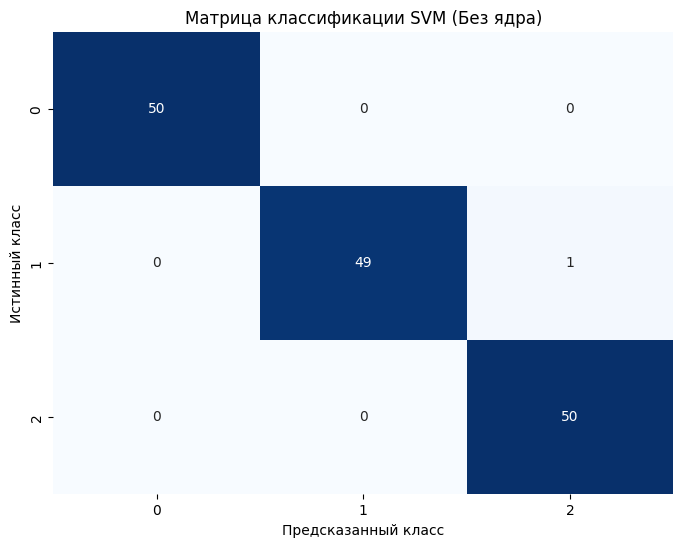


Матрица классификации для SVM (Линейное ядро):
 [[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]


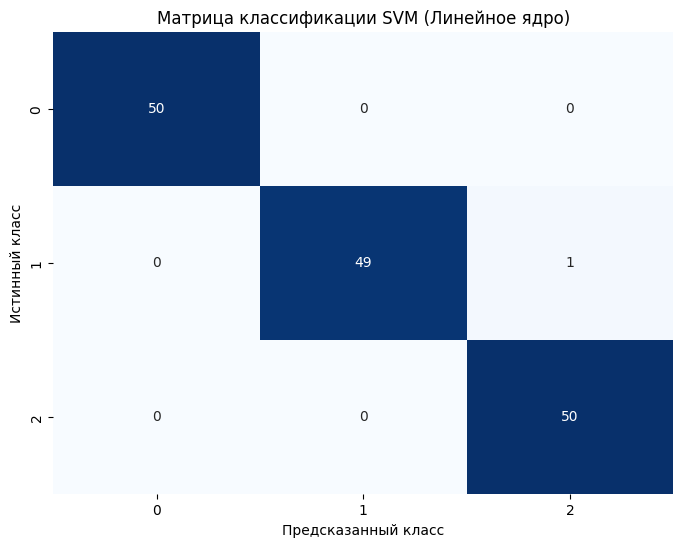


Матрица классификации для SVM (Гауссово ядро):
 [[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]


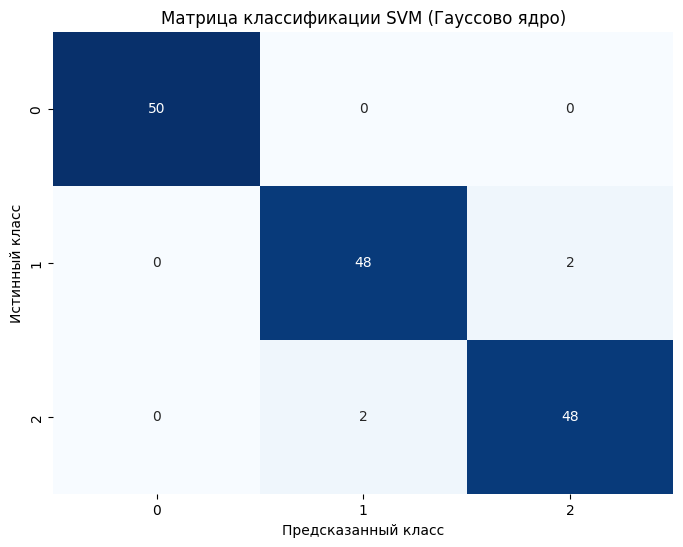


Матрица классификации для SVM (Полиномиальное ядро):
 [[50  0  0]
 [ 0 46  4]
 [ 0  0 50]]


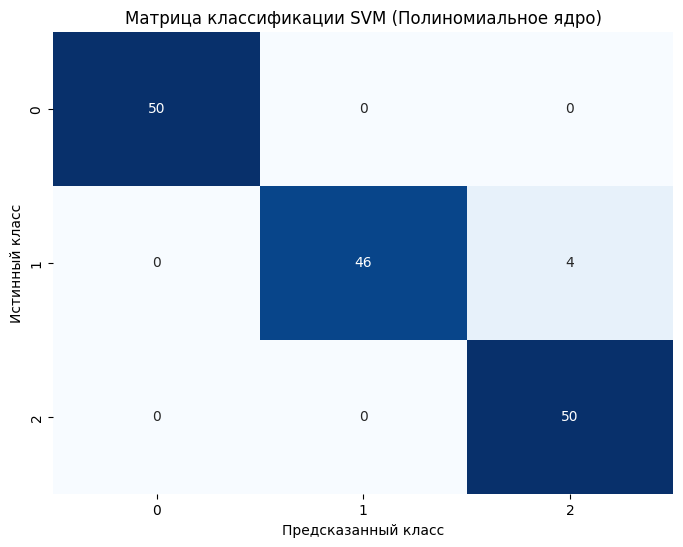


Матрица классификации для KNN:
 [[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


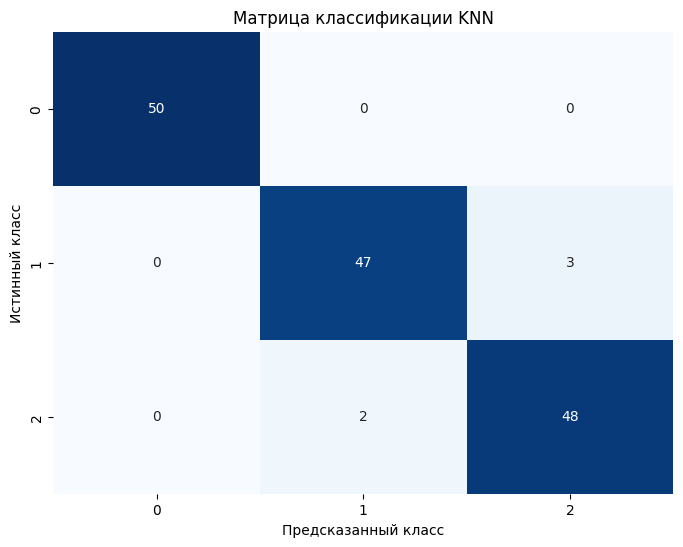


Матрица классификации для MLP:
 [[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


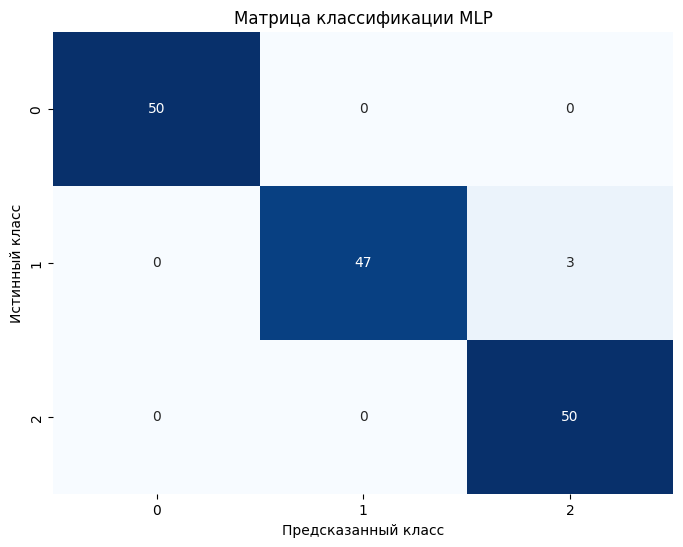


Матрица классификации для Дерево решений:
 [[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


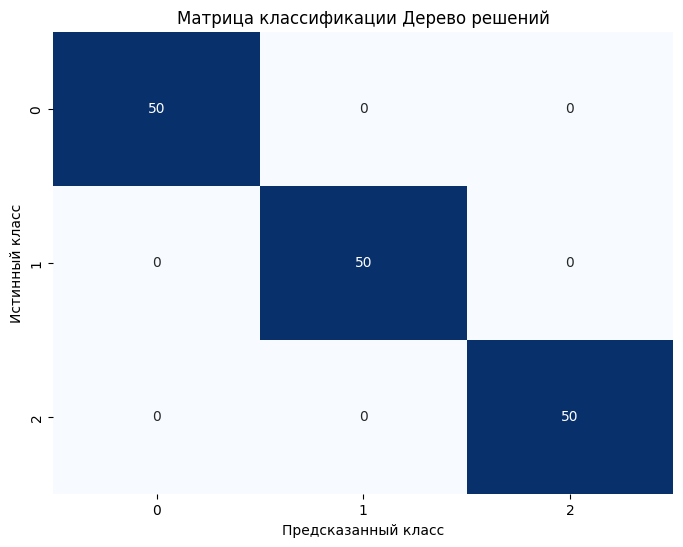


Точность моделей:
SVM (Без ядра): 0.9933
SVM (Линейное ядро): 0.9933
SVM (Гауссово ядро): 0.9733
SVM (Полиномиальное ядро): 0.9733
KNN: 0.9667
MLP: 0.9800
Дерево решений: 1.0000


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

results = train_and_evaluate_models(X, y)

print("\nТочность моделей:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")
